In [0]:
from PIL import Image
import pandas as pd
import math
from sklearn.metrics.pairwise import pairwise_distances, euclidean_distances
import numpy as np
from sklearn.metrics import calinski_harabaz_score, silhouette_samples
import kmedoids
import matplotlib.pyplot as plt
from skimage import io
from sklearn.decomposition import PCA

In [0]:
def write_data_to_csv(source: str, dest_path: str):
    image = Image.open(source)
    width, height = image.size
    with open(dest_path, 'w') as dest_file:
        for x in range(0, width):
            for y in range(0, height):
                pixels = image.getpixel((x,y))[0:3]
                dest_file.write(f'{pixels[0]};{pixels[1]};{pixels[2]}\n')


In [0]:
def read_dataset_from_csv(dataset):
  dataset_df = pd.read_csv(dataset, sep=';', names=['r', 'g', 'b'])
  X = dataset_df.iloc[:, 0:3]
  return X

In [0]:
write_data_to_csv('dataset_6.jpg', 'dataset.csv')

In [0]:
x = np.array(read_dataset_from_csv('dataset.csv'))

In [0]:
x = np.unique(x, axis=0)

In [0]:
D = pairwise_distances(x, metric='euclidean')

In [0]:
def check_which_k_is_good(x: np.ndarray, D: np.ndarray):
  k_s = range(2,10)
  scores = []
  for k in k_s:
    print(f'{k} start')
    M, C = kmedoids.kMedoids(D, k)
    l = np.zeros(x.shape[0])
    for index, array in C.items():
      l[array] = index
    scores.append(calinski_harabaz_score(x,l)) 
    print(f'{k} stop')
  return scores 

  
    
  

In [0]:
fin_sc = None
for i in range(20):
  score = check_which_k_is_good(x, D)
  if fin_sc is None:
    fin_sc = [np.array(score)]
  else:
    fin_sc = np.r_[fin_sc, [np.array(score)]]

(8,)

Text(0,0.5,'calinski harabasz score')

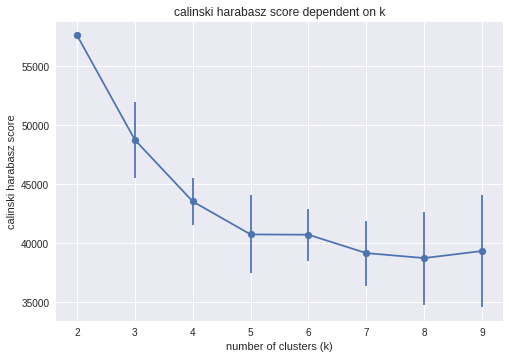

In [174]:
means = fin_sc.mean(axis=0)
errors = fin_sc.std(axis=0)
plt.scatter(range(2,10), means)
plt.errorbar(range(2,10),means, errors)
plt.title("calinski harabasz score dependent on k")
plt.xlabel('number of clusters (k)')
plt.ylabel('calinski harabasz score')

In [0]:
M, C = kmedoids.kMedoids(D, 2)


In [0]:
palette = np.array(x[M], dtype=np.uint8)



In [144]:
palette

array([[ 83,  78,  46],
       [198, 211, 227]], dtype=uint8)

In [0]:
indices = np.array([np.arange(0, len(palette))])

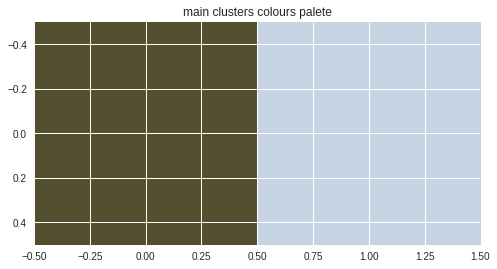

In [146]:
plt.imshow(palette[indices])
plt.title('main clusters colours palete')
plt.show()

In [0]:
from sklearn.decomposition import PCA

In [0]:
new_ = None
for i,v in C.items():
  labels = np.c_[x[C[i]],np.ones(x[C[i]].shape[0])*i]
  if new_ is None:
    new_=np.array(labels)
  else:
    new_ = np.concatenate((new_, np.array(labels)), axis =0)

In [0]:
X_new = new_[:,:3]

In [150]:
X_new

array([[ 13.,  15.,   2.],
       [ 15.,  23.,  12.],
       [ 16.,  23.,  29.],
       ...,
       [250., 255., 255.],
       [251., 249., 254.],
       [251., 255., 255.]])

In [0]:
pca = PCA(n_components=2)
pca.fit(X_new)
X = pca.transform(X_new)

In [0]:
xDDD = np.array(new_[:,3],dtype =np.int)

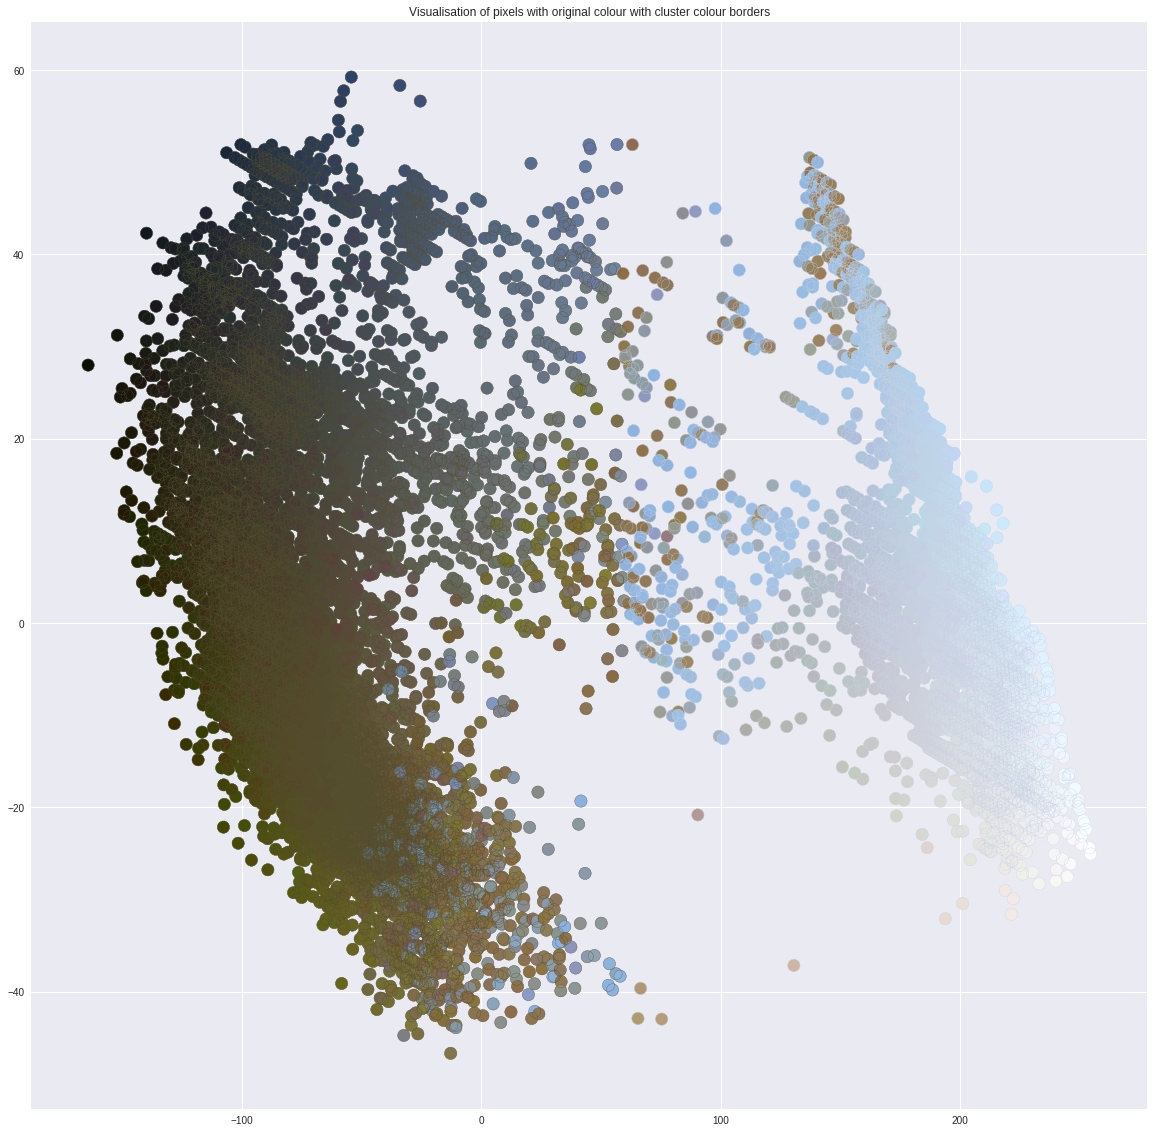

In [153]:
plt.figure(figsize=(20,20))
plt.scatter(X[:,0], X[:,1], c=x/255.0, s=150)
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors=palette[xDDD]/255.0,  s=150)
plt.title("Visualisation of pixels with original colour with cluster colour borders")
plt.show()


In [0]:
bang = np.zeros(x.shape[0])
for index, array in C.items():
  bang[array] = index


In [0]:
silhouette = silhouette_samples(x, bang)

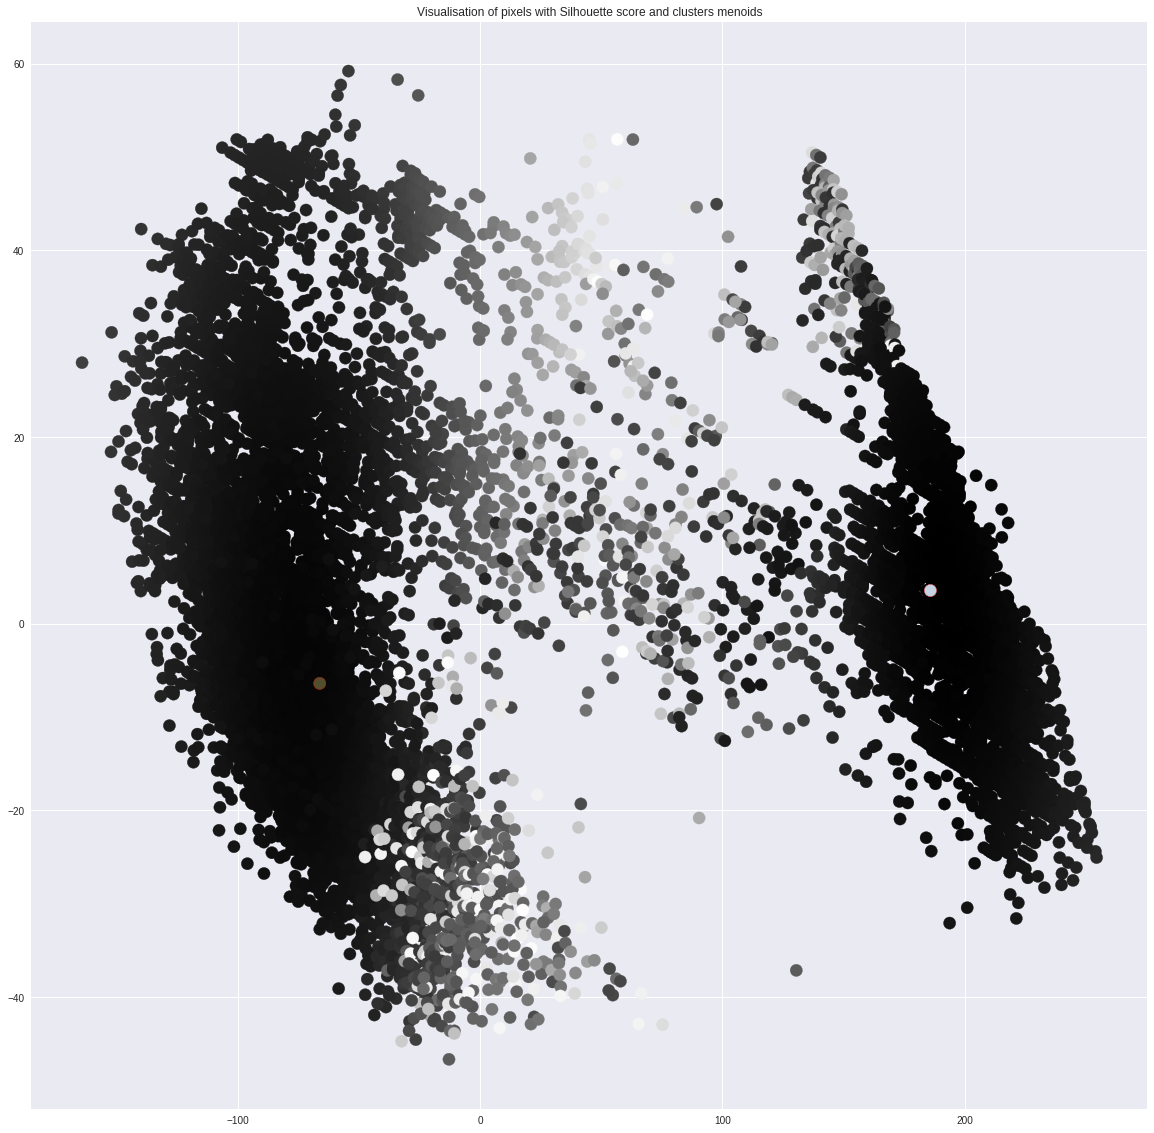

In [156]:
plt.figure(figsize=(20,20))
plt.scatter(X[:,0], X[:,1], c=silhouette, s=150)
plt.scatter(X[M][:,0],X[M][:,1], c =x[M]/255.0, s=150 )
plt.scatter(X[M][:,0],X[M][:,1], facecolors='none', edgecolors='r', s=150 )

plt.title("Visualisation of pixels with Silhouette score and clusters menoids")
plt.show()
